In [68]:
import os
import json

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize   

file_path = "../../data/raw/yp_competitors.json"
if os.path.exists(file_path):    
    dataset = pd.read_json(file_path, orient='columns')    
else: 
    print("file not yet created")
    
dataset.head()

,alias,categories,coordinates,display_phone,dist_to_alias,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,transactions,url
0,kimos-maui-lahaina,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 20.87595, 'longitude': -156.68056}",(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,"{'address1': '845 Front St', 'address2': 'Ste ...",Kimo's Maui,+18086614811,$$,4.0,2571,[],https://www.yelp.com/biz/kimos-maui-lahaina?ad...
1,lahaina-fish-lahaina,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 20.8760421040478, 'longitude': -1...",(808) 661-3472,kimos-maui-lahaina,10.241855,ncPIDj9ybOeOESkhIdUkQQ,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,False,"{'address1': '831 Front St', 'address2': '', '...",Lahaina Fish,+18086613472,$$,4.0,1947,[],https://www.yelp.com/biz/lahaina-fish-lahaina?...
2,blu-maui-lahaina,"[{'alias': 'restaurants', 'title': 'Restaurant...","{'latitude': 20.87581, 'longitude': -156.68044}",(808) 661-9591,kimos-maui-lahaina,14.320386,9I_XJDk_q1HVWRDiwRTwsg,,False,"{'address1': '839 Front St', 'address2': None,...",Blu Maui,+18086619591,NaN,4.0,1,[],https://www.yelp.com/biz/blu-maui-lahaina?adju...
3,the-dirty-monkey-lahaina,"[{'alias': 'sportsbars', 'title': 'Sports Bars...","{'latitude': 20.87614, 'longitude': -156.68013}",(808) 419-6268,kimos-maui-lahaina,51.873763,4UH_LSVtf41B1Cr6lx2-5g,https://s3-media1.fl.yelpcdn.com/bphoto/tLyR3z...,False,"{'address1': '844 Front St', 'address2': 'Upst...",The Dirty Monkey,+18084196268,$$,4.0,289,[],https://www.yelp.com/biz/the-dirty-monkey-laha...
4,lahaina-sushi-ko-lahaina-2,"[{'alias': 'sushi', 'title': 'Sushi Bars'}, {'...","{'latitude': 20.87614, 'longitude': -156.68013}",(808) 214-5352,kimos-maui-lahaina,51.873763,aeG9ZSWgTV4AEA11ev3Gtw,https://s3-media3.fl.yelpcdn.com/bphoto/Mi_AFu...,False,"{'address1': '844 Front St', 'address2': 'Ste ...",Lahaina Sushi Ko,+18082145352,$$,4.5,118,[],https://www.yelp.com/biz/lahaina-sushi-ko-laha...


In [72]:
# restaurants, 'seafood', 'desserts', 'vegetarian', 
# if i['alias'] in ['restaurants', 'seafood', 'desserts', 'vegetarian']
categ = dataset.categories.apply(lambda x: [i['alias'] for i in x])

categ2 = categ.apply(
    lambda x: 
    x 
    if len([i for i in x if i in ['restaurants', 'seafood', 'desserts', 'vegetarian']]) > 0 
    else []
)

categ2[:10]

0    [seafood, hawaiian, newamerican]
1      [seafood, steak, tradamerican]
2                       [restaurants]
3                                  []
4                                  []
5                                  []
6                                  []
7                                  []
8     [thai, vegetarian, gluten_free]
9        [icecream, desserts, coffee]
Name: categories, dtype: object

In [73]:
len([i for i in categ2 if len(i) > 0])

740

In [74]:
# fixing columns
# transactions 
dataset.transactions = dataset.transactions.apply(lambda x: ','.join(x))

# category
pd_categories_alias = dataset.categories.apply(lambda x: ', '.join([i['alias'] for i in x]))
pd_categories_title = dataset.categories.apply(lambda x: ', '.join([i['title'] for i in x]))
pd_categories_alias.name = 'category_' + 'alias'
pd_categories_title.name = 'category_' + 'title'

In [75]:
# expanding json columns
# coordinate
pd_coordinates = dataset.coordinates.apply(pd.Series)
pd_coordinates.columns = 'coordinate_' + pd_coordinates.columns

# location
pd_location = dataset.location.apply(pd.Series)
pd_location.display_address = pd_location.display_address.apply(lambda x: ','.join(x))
pd_location.columns = 'location_' + pd_location.columns

In [76]:
# merging all in one
dataset2 = pd.concat(
    [dataset, pd_categories_alias, pd_categories_title, pd_coordinates, pd_location], 
    axis=1
).drop(['categories', 'location', 'coordinates'], axis=1)
dataset2.columns
dataset = dataset2

In [35]:
# from JSON to CSV
dataset2.to_csv('../../data/raw/yp_competitors.csv', index=False)
pd.read_csv('../../data/raw/yp_competitors.csv').head()

,alias,display_phone,dist_to_alias,distance,id,image_url,is_closed,name,phone,price,...,coordinate_latitude,coordinate_longitude,location_address1,location_address2,location_address3,location_city,location_zip_code,location_country,location_state,location_display_address
0,kimos-maui-lahaina,(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,Kimo's Maui,1.808661e+10,$$,...,20.875950,-156.680560,845 Front St,Ste A,NaN,Lahaina,96761.0,US,HI,"845 Front St,Ste A,Lahaina, HI 96761"
1,lahaina-fish-lahaina,(808) 661-3472,kimos-maui-lahaina,10.241855,ncPIDj9ybOeOESkhIdUkQQ,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,False,Lahaina Fish,1.808661e+10,$$,...,20.876042,-156.680561,831 Front St,NaN,NaN,Lahaina,96761.0,US,HI,"831 Front St,Lahaina, HI 96761"
2,blu-maui-lahaina,(808) 661-9591,kimos-maui-lahaina,14.320386,9I_XJDk_q1HVWRDiwRTwsg,NaN,False,Blu Maui,1.808662e+10,NaN,...,20.875810,-156.680440,839 Front St,NaN,NaN,Lahaina,96767.0,US,HI,"839 Front St,Lahaina, HI 96767"
3,the-dirty-monkey-lahaina,(808) 419-6268,kimos-maui-lahaina,51.873763,4UH_LSVtf41B1Cr6lx2-5g,https://s3-media1.fl.yelpcdn.com/bphoto/tLyR3z...,False,The Dirty Monkey,1.808420e+10,$$,...,20.876140,-156.680130,844 Front St,Upstairs,NaN,Lahaina,96761.0,US,HI,"844 Front St,Upstairs,Lahaina, HI 96761"
4,lahaina-sushi-ko-lahaina-2,(808) 214-5352,kimos-maui-lahaina,51.873763,aeG9ZSWgTV4AEA11ev3Gtw,https://s3-media3.fl.yelpcdn.com/bphoto/Mi_AFu...,False,Lahaina Sushi Ko,1.808215e+10,$$,...,20.876140,-156.680130,844 Front St,Ste 106,NaN,Lahaina,96761.0,US,HI,"844 Front St,Ste 106,Lahaina, HI 96761"


## Examining Total Category List

In [148]:
# restaurants categories in the dataset: all
print(sorted(set(', '.join(dataset.category_alias).split(', '))))

['acaibowls', 'accessories', 'active', 'afghani', 'airportlounges', 'amateursportsteams', 'amusementparks', 'antiques', 'aquariums', 'aquariumservices', 'arabian', 'arcades', 'argentine', 'artclasses', 'artmuseums', 'artsandcrafts', 'asianfusion', 'australian', 'bagels', 'bakeries', 'banks', 'bars', 'baseballfields', 'basketballcourts', 'basque', 'bbq', 'beachequipmentrental', 'beaches', 'beer_and_wine', 'beerbar', 'beergardens', 'bike_repair_maintenance', 'bikerentals', 'bikes', 'biketours', 'boatcharters', 'boating', 'boattours', 'bookstores', 'bootcamps', 'bowling', 'brasseries', 'brazilian', 'breakfast_brunch', 'breweries', 'brewpubs', 'british', 'bubbletea', 'buffets', 'burgers', 'burmese', 'butcher', 'cafes', 'cafeteria', 'cajun', 'cakeshop', 'campgrounds', 'candy', 'cantonese', 'caribbean', 'casinos', 'catering', 'cheese', 'cheesesteaks', 'chicken_wings', 'chickenshop', 'childrensmuseums', 'chinese', 'chocolate', 'cideries', 'cigarbars', 'climbing', 'clubcrawl', 'cocktailbars', 

In [149]:
yelp_categories = pd.read_json("../../data/raw/categories.json")

# select only one parent categories
yelp_categories = yelp_categories[yelp_categories.parents.apply(lambda x: len(x) == 1) == True]
res_list = yelp_categories[yelp_categories.parents.apply(lambda x: len([i for i in x if i in 'restaurants']) > 0)]
res_list = res_list.alias
print(set(res_list))

{'newamerican', 'nightfood', 'salad', 'bistros', 'beergarden', 'popuprestaurants', 'freiduria', 'schnitzel', 'eastern_european', 'beisl', 'british', 'korean', 'guamanian', 'russian', 'turkish', 'uzbek', 'pakistani', 'delis', 'hungarian', 'singaporean', 'tex-mex', 'latin', 'honduran', 'portuguese', 'scottish', 'african', 'diners', 'brasseries', 'czechslovakian', 'breakfast_brunch', 'yugoslav', 'cafeteria', 'international', 'newmexican', 'trattorie', 'cajun', 'signature_cuisine', 'swabian', 'cafes', 'norwegian', 'tapas', 'flatbread', 'cheesesteaks', 'iberian', 'kurdish', 'fischbroetchen', 'raw_food', 'parma', 'halal', 'peruvian', 'comfortfood', 'israeli', 'argentine', 'taiwanese', 'danish', 'waffles', 'dumplings', 'irish', 'french', 'asianfusion', 'filipino', 'tapasmallplates', 'fishnchips', 'bavarian', 'greek', 'japanese', 'himalayan', 'vegetarian', 'newzealand', 'foodstands', 'ukrainian', 'malaysian', 'hkcafe', 'moroccan', 'catalan', 'galician', 'meatballs', 'somali', 'traditional_swed

In [150]:
'arabian' in res_list.values

True

In [151]:
dataset.category_alias.head()

0          seafood, hawaiian, newamerican
1            seafood, steak, tradamerican
2                             restaurants
3    sportsbars, whiskeybars, musicvenues
4                         sushi, japanese
Name: category_alias, dtype: object

In [154]:
df_res_list = dataset[dataset.category_alias.apply(lambda x: len([i for i in x.split(', ') if i in res_list.values]) > 0)]
len(df_res_list)

4209

In [155]:
df_res_list.head()

,alias,display_phone,dist_to_alias,distance,id,image_url,is_closed,name,phone,price,...,coordinate_latitude,coordinate_longitude,location_address1,location_address2,location_address3,location_city,location_zip_code,location_country,location_state,location_display_address
0,kimos-maui-lahaina,(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,Kimo's Maui,+18086614811,$$,...,20.875950,-156.680560,845 Front St,Ste A,,Lahaina,96761,US,HI,"845 Front St,Ste A,Lahaina, HI 96761"
1,lahaina-fish-lahaina,(808) 661-3472,kimos-maui-lahaina,10.241855,ncPIDj9ybOeOESkhIdUkQQ,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,False,Lahaina Fish,+18086613472,$$,...,20.876042,-156.680561,831 Front St,,,Lahaina,96761,US,HI,"831 Front St,Lahaina, HI 96761"
4,lahaina-sushi-ko-lahaina-2,(808) 214-5352,kimos-maui-lahaina,51.873763,aeG9ZSWgTV4AEA11ev3Gtw,https://s3-media3.fl.yelpcdn.com/bphoto/Mi_AFu...,False,Lahaina Sushi Ko,+18082145352,$$,...,20.876140,-156.680130,844 Front St,Ste 106,,Lahaina,96761,US,HI,"844 Front St,Ste 106,Lahaina, HI 96761"
6,cheeseburger-in-paradise-lahaina-2,(808) 661-4855,kimos-maui-lahaina,67.341773,II4S0jgLBQng1lVY1ks4Sg,https://s3-media2.fl.yelpcdn.com/bphoto/w4cnrS...,False,Cheeseburger In Paradise,+18086614855,$$,...,20.875471,-156.680163,811 Front St,,None,Lahaina,96761,US,HI,"811 Front St,Lahaina, HI 96761"
7,surf-ripper-lahaina-5,(808) 635-2903,kimos-maui-lahaina,68.105631,S5wFd_xBN0dKq6MA6opqag,https://s3-media2.fl.yelpcdn.com/bphoto/UIHOh1...,False,Surf Ripper,+18086352903,$,...,20.875387,-156.680109,819 Front St,None,,Lahaina,96761,US,HI,"819 Front St,Lahaina, HI 96761"


In [112]:
from itertools import chain
set(chain(*[i.split(',') for i in set(dataset.transactions)]))

{'', 'delivery', 'pickup', 'restaurant_reservation'}

In [158]:
df_transactions = dataset[dataset.transactions.apply(lambda x: len(x) > 0)]
len(df_transactions)

1019

In [83]:
df_transactions_not = dataset[dataset.transactions.apply(lambda x: len(x) == 0)]
len(df_transactions_not)

5645

In [44]:
# restaurants? [BUSINESSES with TRANSACTION]
print(set(', '.join(df_transactions.category_alias).split(', ')))

{'newamerican', 'salad', 'breweries', 'british', 'korean', 'turkish', 'russian', 'pakistani', 'delis', 'singaporean', 'tex-mex', 'latin', 'cupcakes', 'seafoodmarkets', 'teppanyaki', 'bagels', 'diners', 'lounges', 'brasseries', 'oliveoil', 'breakfast_brunch', 'poke', 'newmexican', 'healthmarkets', 'shavedice', 'bakeries', 'cajun', 'tea', 'cafes', 'tapas', 'gelato', 'cocktailbars', 'cheesesteaks', 'raw_food', 'peruvian', 'halal', 'comfortfood', 'argentine', 'meats', 'taiwanese', 'icecream', 'waffles', 'wine_bars', 'izakaya', 'irish', 'beer_and_wine', 'french', 'asianfusion', 'tapasmallplates', 'bubbletea', 'sportsbars', 'fishnchips', 'greek', 'catering', 'japanese', 'vegetarian', 'himalayan', 'divebars', 'foodstands', 'vapeshops', 'hkcafe', 'szechuan', 'bbq', 'persian', 'australian', 'poolhalls', 'customcakes', 'gluten_free', 'sandwiches', 'seafood', 'wraps', 'vegan', 'italian', 'hawaiian', 'tradamerican', 'tacos', 'donuts', 'acaibowls', 'steak', 'pizza', 'lebanese', 'cakeshop', 'sicilia

In [45]:
# not restaurants? [BUSINESSES w/o TRANSACTION]
print(set(', '.join(df_transactions_not.category_alias).split(', ')))

{'newamerican', 'poolservice', 'salad', 'museums', 'breweries', 'golflessons', 'stationery', 'countryclubs', 'yoga', 'education', 'airportlounges', 'playgrounds', 'waterstores', 'drugstores', 'popuprestaurants', 'specialtyschools', 'arcades', 'meditationcenters', 'beachequipmentrental', 'rafting', 'toys', 'british', 'markets', 'korean', 'turkish', 'trampoline', 'russian', 'pakistani', 'delis', 'healthtrainers', 'summer_camps', 'outdoormovies', 'tex-mex', 'nightlife', 'herbsandspices', 'localservices', 'artsandcrafts', 'latin', 'travelagents', 'cupcakes', 'daycamps', 'seafoodmarkets', 'shanghainese', 'portuguese', 'gaybars', 'horsebackriding', 'teppanyaki', 'travelservices', 'mountainbiking', 'outdoorgear', 'scottish', 'active', 'bagels', 'lounges', 'diners', 'sledding', 'yelpevents', 'breakfast_brunch', 'sports_clubs', 'chocolate', 'pets', 'cafeteria', 'fooddeliveryservices', 'beaches', 'poke', 'discgolf', 'newmexican', 'souvenirs', 'healthmarkets', 'shavedice', 'bakeries', 'giftshops'

In [114]:
print(f"{len(dataset)}")
print(f"{len(dataset.alias.unique())}")

6664
6664


In [115]:
dataset[dataset.alias == "kimos-maui-lahaina"]
dataset[(dataset.dist_to_alias == "kimos-maui-lahaina") & (dataset.distance < 50)]


,alias,display_phone,dist_to_alias,distance,id,image_url,is_closed,name,phone,price,...,coordinate_latitude,coordinate_longitude,location_address1,location_address2,location_address3,location_city,location_zip_code,location_country,location_state,location_display_address
0,kimos-maui-lahaina,(808) 661-4811,kimos-maui-lahaina,4.279984,Xi1rLxy0nRtnRCeLVO-Dlw,https://s3-media2.fl.yelpcdn.com/bphoto/hpFDMF...,False,Kimo's Maui,+18086614811,$$,...,20.875950,-156.680560,845 Front St,Ste A,,Lahaina,96761,US,HI,"[845 Front St, Ste A, Lahaina, HI 96761]"
1,lahaina-fish-lahaina,(808) 661-3472,kimos-maui-lahaina,10.241855,ncPIDj9ybOeOESkhIdUkQQ,https://s3-media4.fl.yelpcdn.com/bphoto/gntAYO...,False,Lahaina Fish,+18086613472,$$,...,20.876042,-156.680561,831 Front St,,,Lahaina,96761,US,HI,"[831 Front St, Lahaina, HI 96761]"
2,blu-maui-lahaina,(808) 661-9591,kimos-maui-lahaina,14.320386,9I_XJDk_q1HVWRDiwRTwsg,,False,Blu Maui,+18086619591,NaN,...,20.875810,-156.680440,839 Front St,None,,Lahaina,96767,US,HI,"[839 Front St, Lahaina, HI 96767]"


In [75]:
pd_location.columns = 'loc_' + pd_location.columns
pd_location.columns

Index(['loc_address1', 'loc_address2', 'loc_address3', 'loc_city',
       'loc_zip_code', 'loc_country', 'loc_state', 'loc_display_address'],
      dtype='object')

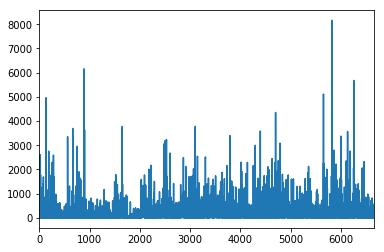

In [10]:
import matplotlib.pyplot as plt
dataset.review_count.plot()
plt.show()

In [11]:
yelp_branches = [
    'kimos-maui-lahaina',
    'sunnyside-tahoe-city-2',
    'dukes-huntington-beach-huntington-beach-2',
    'dukes-la-jolla-la-jolla',
    'dukes-malibu-malibu-2',
    'dukes-beach-house-lahaina',
    'dukes-kauai-lihue-3',
    'dukes-waikiki-honolulu-2',
    'hula-grill-waikiki-honolulu-3',
    'hula-grill-kaanapali-lahaina-2',
    'keokis-paradise-koloa',
    'leilanis-lahaina-2'
]
[i for i in dataset.alias.values if i in yelp_branches]

['kimos-maui-lahaina',
 'leilanis-lahaina-2',
 'hula-grill-kaanapali-lahaina-2',
 'dukes-beach-house-lahaina',
 'sunnyside-tahoe-city-2',
 'dukes-huntington-beach-huntington-beach-2',
 'dukes-la-jolla-la-jolla',
 'dukes-malibu-malibu-2',
 'dukes-kauai-lihue-3',
 'keokis-paradise-koloa',
 'dukes-waikiki-honolulu-2',
 'hula-grill-waikiki-honolulu-3']

## Exploratory Data Analysis

In [212]:
print(dataset.loc[dataset.alias.isin(yelp_branches)].rating.sum())
print(dataset.loc[dataset.alias.isin(yelp_branches)].rating.mean())

47.5
3.9583333333333335


In [70]:
len(dataset)

6664

In [123]:
dataset.is_closed[dataset.is_closed == True].count()

0

In [194]:
dataset.price.value_counts()

$$      2516
$       1952
$$$      312
$$$$      70
Name: price, dtype: int64

In [127]:
print(f"sum : {dataset.review_count.sum()}")
print(f"mean: {dataset.review_count.mean()}")

sum : 1416734
mean: 212.5951380552221


In [199]:
print(f"sum : {dataset.rating.sum()}")
print(f"mean: {dataset.rating.mean()}")

sum : 25611.5
mean: 3.8432623049219687


In [171]:
dataset.loc[dataset.alias.isin(yelp_branches)].price.value_counts()

$$    12
Name: price, dtype: int64

In [126]:
print(dataset.loc[dataset.alias.isin(yelp_branches)].review_count.sum())
print(dataset.loc[dataset.alias.isin(yelp_branches)].review_count.mean())

26365
2197.0833333333335


In [181]:
import math


def distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d

In [186]:
origin = dataset.iloc[0].coordinate_latitude, dataset.iloc[0].coordinate_longitude
destination = dataset.iloc[4].coordinate_latitude, dataset.iloc[4].coordinate_longitude
distance(origin, destination) * 1000

49.41870324385432

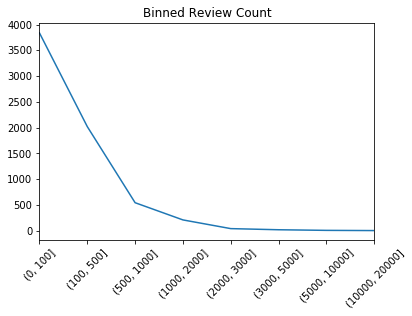

In [160]:
bins = [0, 100, 500, 1000, 2000, 3000, 5000, 10000, 20000]
lbls = [1, 2, 3, 4, 5, 6, 7, 8, 9]
pd_bins = pd.cut(dataset.review_count, bins, lbls).value_counts()
pd_bins.plot(title='Binned Review Count').tick_params(axis='x', labelrotation=45)

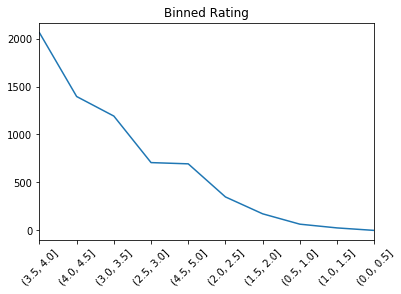

In [164]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
pd_bins = pd.cut(dataset.rating, bins).value_counts()
pd_bins.plot(title='Binned Rating').tick_params(axis='x', labelrotation=45)

In [232]:
pd_bins

(3.5, 4.0]    2061
(4.0, 4.5]    1396
(3.0, 3.5]    1192
(2.5, 3.0]     707
(4.5, 5.0]     694
(2.0, 2.5]     349
(1.5, 2.0]     173
(0.5, 1.0]      65
(1.0, 1.5]      26
(0.0, 0.5]       0
Name: rating, dtype: int64